In [108]:
import pandas as pd
import pickle
import numpy as np
from dynamicTreeCut import cutreeHybrid

with open("/Users/amaros/Desktop/mgss2_python/PKL_files/samples_dist.pkl", "rb") as file :
    samples_dist = pickle.load(file)

with open("/Users/amaros/Desktop/mgss2_python/PKL_files/samples_hc.pkl", "rb") as file :
    samples_hc = pickle.load(file)

In [1]:
import pandas as pd

df = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.params.df.csv")
colors_mgCSTs = pd.read_csv("colors_mgcst.csv")
data = df[(df['deepSplit'] == 4) & (df['minClusterSize'] == 10)].rename(columns={'dtc' : 'mgCST'})
projects = pd.read_csv("/Users/amaros/Desktop/mgss2/SOURCE_DATA/VIRGO2_projects.csv")
data = data.reset_index(drop = True).join(projects)
data

,mgCST,minClusterSize,deepSplit,sampleID,Project
0,19,10,4,323752_MG,LSVF
1,1,10,4,323756_MG,LSVF
2,30,10,4,323757_MG,LSVF
3,3,10,4,323758_MG,LSVF
4,2,10,4,323760_MG,LSVF
...,...,...,...,...,...
2523,5,10,4,SRR18765405,FIJI
2524,14,10,4,SRR18765406,FIJI
2525,14,10,4,SRR18765408,FIJI
2526,12,10,4,SRR18765409,FIJI


In [110]:
df_plot = data
df_plot['mgCST'].value_counts()

mgCST
1     181
2     135
3     128
4     126
5     115
6     114
7     109
8     102
9      97
10     95
11     92
12     87
13     76
14     71
15     69
16     64
17     58
18     51
19     50
20     48
21     45
22     44
23     44
24     42
25     37
26     35
27     33
28     32
29     31
31     28
30     28
32     27
33     24
34     22
35     20
37     19
36     19
39     18
38     18
40     17
41     16
42     15
43     14
44     12
45     10
46     10
Name: count, dtype: int64

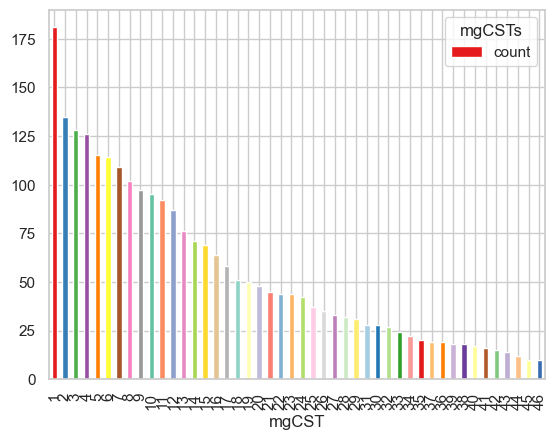

In [111]:
df_plot = data
ax = df_plot['mgCST'].value_counts().plot(kind='bar', color=colors_mgCSTs['color'].values, legend = True)
ax.legend(title = 'mgCSTs')


/var/folders/h5/ld8fm2tx5hx6b_hqkmxxbx_00000gp/T/ipykernel_95862/4282239835.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.countplot(x = 'mgCST', data = data,hue = 'mgCST',legend=False, palette=colors_mgCSTs['color'].values)


Text(0, 0.5, 'Counts')

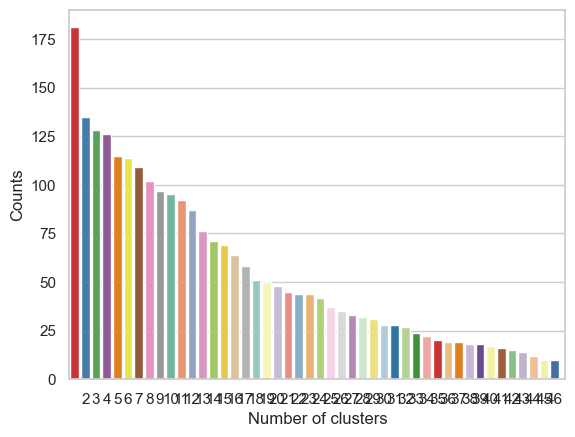

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
ax = sns.countplot(x = 'mgCST', data = data,hue = 'mgCST',legend=False, palette=colors_mgCSTs['color'].values)
# ax.bar(data['labels'].value_counts().index, data['labels'].value_counts().values)
plt.xlabel("Number of clusters")
plt.xticks(data['mgCST'].value_counts().index)
plt.ylabel("Counts")


Project,Chinese,FIJI,Gates-Stanford,Gates-UMD,Irish,LSVF,MMOTH,PreSSMat,STING,Symptoms,VMRC,XPENN,ZAPPS
mgCST,,,,,,,,,,,,,
1,NaN,NaN,5.0,12.0,1.0,49.0,5.0,20.0,14.0,25.0,NaN,23.0,27.0
2,NaN,NaN,19.0,21.0,3.0,25.0,2.0,1.0,16.0,24.0,1.0,14.0,9.0
3,NaN,NaN,9.0,14.0,2.0,60.0,5.0,NaN,1.0,17.0,3.0,16.0,1.0
4,1.0,2.0,2.0,1.0,11.0,30.0,1.0,20.0,NaN,1.0,NaN,6.0,51.0
5,NaN,4.0,NaN,NaN,NaN,78.0,NaN,3.0,7.0,NaN,NaN,2.0,21.0


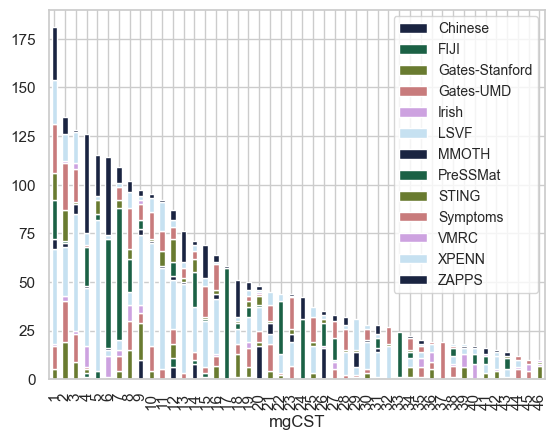

In [113]:
df2 = data.groupby(["Project", "mgCST"]).size().reset_index().pivot(columns='Project', index = 'mgCST', values =0)
display(df2.head())
df2.plot(kind='bar', stacked=True)
plt.legend(loc = "best", fontsize = "small")

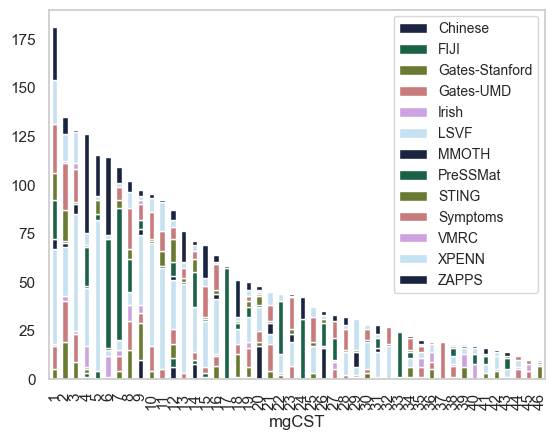

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Change the Seaborn theme
# sns.set_style("darkgrid")  # You can choose a different theme here
# sns.color_palette("viridis", as_cmap=True)
sns.set_theme(style="whitegrid", palette="cubehelix")
df2 = data.groupby(["Project", "mgCST"]).size().reset_index().pivot(columns='Project', index='mgCST', values=0)
ax = df2.plot(kind='bar', stacked=True)
ax.grid(False)
plt.legend(loc="best", fontsize="small")
plt.show()


In [115]:
species_abund = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.df.csv")
species_abund.head()

,dtc,meanRelabund,domTaxa,minClusterSize,deepSplit
0,1,0.241664,MultiGenera,10,0
1,2,0.561022,Lactobacillus_iners_7,10,0
2,3,0.298385,Gardnerella_swidsinkii_1,10,0
3,4,0.635330,Lactobacillus_iners_2,10,0
4,5,0.590038,Lactobacillus_iners_1,10,0


In [2]:
df = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.params.df.csv").rename(columns={'dtc' : 'mgCST'})
projects = pd.read_csv("/Users/amaros/Desktop/mgss2/SOURCE_DATA/VIRGO2_projects.csv")
species_abund = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.df.csv").rename(columns={'dtc' : 'mgCST'})
colors_mgCSTs = pd.read_csv("colors_mgcst.csv")

deep, minc = 3,10

data = df[(df['deepSplit'] == deep) & (df['minClusterSize'] == minc)]
data = data.reset_index(drop = True)
data = data.join(projects)
# df2 = data.groupby(["Project", "mgCST"]).size().reset_index().pivot(columns='Project', index = 'mgCST', values =0)

most_abundant = species_abund[(species_abund['deepSplit'] == deep) & (species_abund['minClusterSize'] == minc)]
most_abundant = most_abundant[['mgCST', 'domTaxa', 'meanRelabund']]
most_abundant = pd.merge(most_abundant, colors_mgCSTs, on = "mgCST", how = "left")

In [3]:
df = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.params.df.csv")
species_abund = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.df.csv")
most_abundant = species_abund[(species_abund['deepSplit'] == deep) & (species_abund['minClusterSize'] == minc)]
most_abundant = most_abundant[['dtc', 'domTaxa', 'meanRelabund']]
# most_abundant = pd.merge(most_abundant, colors_mgCSTs, on = "mgCST", how = "left")

display(most_abundant.head())
print(most_abundant.shape)

,dtc,domTaxa,meanRelabund
52,1,Gardnerella_swidsinkii_1,0.258017
53,2,MultiGenera,0.213114
54,3,Lactobacillus_paragasseri_1,0.439911
55,4,MultiGenera,0.245094
56,5,MultiGenera,0.216987


(31, 3)


In [23]:
most_abundant.groupby('domTaxa').count().sort_values(by='dtc', ascending=False).sort_values(by='domTaxa', ascending=True)

,dtc,meanRelabund
domTaxa,,
Gardnerella_piotii_1,1,1
Gardnerella_swidsinkii_1,1,1
Gardnerella_vaginalis_2,1,1
Lactobacillus_crispatus_1,1,1
Lactobacillus_crispatus_2,1,1
Lactobacillus_crispatus_3,1,1
Lactobacillus_crispatus_4,1,1
Lactobacillus_crispatus_5,1,1
Lactobacillus_crispatus_6,1,1


In [36]:
most_abundant['domTaxa'].value_counts().sort_values(ascending=False)

domTaxa
MultiGenera                    3
Lactobacillus_iners_2          2
Lactobacillus_paragasseri_1    1
Lactobacillus_iners_1          1
UBA629_sp005465875_1           1
Lactobacillus_crispatus_3      1
Lactobacillus_iners_6          1
Lactobacillus_crispatus_1      1
Lactobacillus_crispatus_2      1
Lactobacillus_iners_4          1
UBA629_sp005465875_3           1
Lactobacillus_crispatus_6      1
Gardnerella_vaginalis_2        1
Limosilactobacillus_oris       1
Lactobacillus_crispatus_8      1
Lactobacillus_iners_7          1
Lactobacillus_crispatus_7      1
Lactobacillus_crispatus_5      1
Lactobacillus_iners_3          1
Lactobacillus_iners_8          1
Gardnerella_piotii_1           1
Lactobacillus_gasseri_2        1
Lactobacillus_mulieris_1       1
Lactobacillus_gasseri_1        1
Lactobacillus_jensenii_2       1
Lactobacillus_crispatus_4      1
Gardnerella_swidsinkii_1       1
Lactobacillus_jensenii_3       1
Name: count, dtype: int64